In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import math
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = pd.read_excel("/content/btc final.xls")
data=data.set_index('Date')
data.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
tf.keras.callbacks.EarlyStopping(
    'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
model =Sequential()
model.add(LSTM(256, return_sequences=True, input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.01))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.01))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error',metrics =["accuracy"])
model.fit(x_train,y_train,epochs=1,validation_split=0.2,callbacks=[es_callback])
test_data=scaled_data[training_data_len - 60:,:]
x_test= []
y_test= dataset[training_data_len:,:]
for y in range(60,len(test_data)):
  x_test.append(test_data[y-60:y,0])
x_test =np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

55/55 [==============================] - 20s 299ms/step - loss: 3.9599e-04 - accuracy: 0.0000e+00 - val_loss: 2.6342e-04 - val_accuracy: 0.0000e+00


In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(r2_score(y_test, predictions))

0.9480171750893673


In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions']= predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


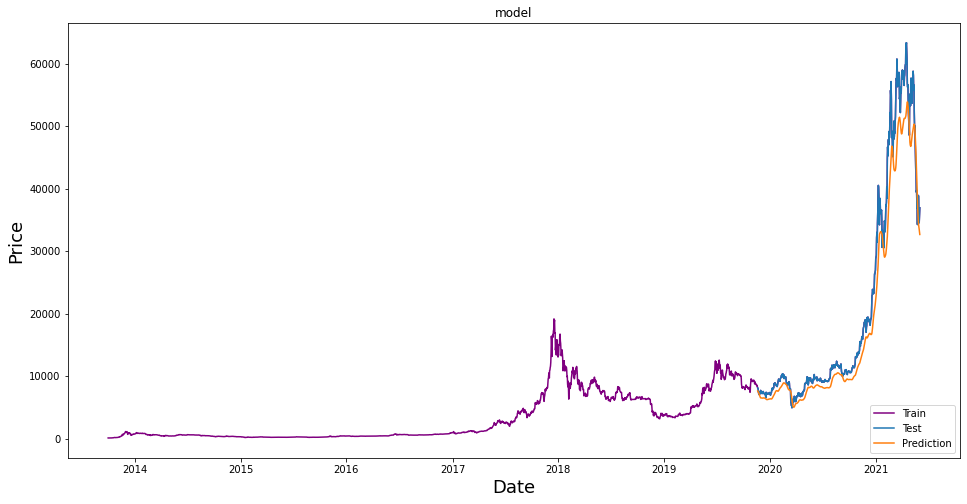

In [ ]:
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.plot(data['Price '],color="purple")
plt.plot(valid[['Price ','predictions']])
plt.legend(['Train','Test','Prediction'],loc='lower right')
plt.show()

In [ ]:
print(valid[['Price ','predictions']])

                  Price    predictions
Date                                  
2019-11-20   8118.488536   7633.880859
2019-11-21   8074.843174   7557.849609
2019-11-22   7612.740574   7478.818848
2019-11-23   7262.110535   7375.491699
2019-11-24   7303.405759   7241.579102
...                  ...           ...
2021-05-28  38717.769220  34168.062500
2021-05-29  34898.008720  33852.832031
2021-05-30  34535.522468  33466.789062
2021-05-31  35749.655692  33033.605469
2021-06-01  36929.476740  32668.107422

[560 rows x 2 columns]


In [ ]:
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
train_dataa= dataset[0:training_data_len, :]
test_dataa=dataset[training_data_len - 60:,:]
train_dataa=pd.DataFrame(train_dataa)
train_dataa.rename(columns={0:'Price'}, inplace=True)
test_dataa=pd.DataFrame(test_dataa)
test_dataa.rename(columns={0:'Price'}, inplace=True)
total_dataset=pd.concat((train_dataa["Price"],test_dataa["Price"]),axis=0)
model_inputs=total_dataset[len(total_dataset)-len(test_data)-60:].values
model_inputs=model_inputs.reshape(-1,1)
model_inputs=scaler.transform(model_inputs)
real_data=[model_inputs[len(model_inputs) +1-60:len(model_inputs+1 ),0]]
real_data=np.array(real_data)
real_data=np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))
prediction=model.predict(real_data)
prediction=scaler.inverse_transform(prediction)
y= (valid['Price '])
x=(valid['predictions'])
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept
final = myfunc(prediction)
print(f"prediction for next day :{final}")

prediction for next day :[[36842.586]]
